In [38]:
%reload_ext autoreload
%autoreload 2

# MY HYPOTHESIS:


## Most of the students who are taking comp 110 have no previous experience in coding.



### First things first: I need to read the CSV and convert it into a column-oriented table.


In [39]:
from data_utils import columnar, read_csv_rows

data_rows: dict[str, list[str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

### Lets see if we can view this as a data table:


In [40]:
from data_utils import column_values, columnar, head, select

subset: dict[str, list[str]] = select(columns, ["prior_exp"])
sunset: dict[str, list[str]] = head(subset, 10)

from tabulate import tabulate

tabulate(sunset, sunset.keys(), "html")



prior_exp
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
Over 2 years
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!


### So far it seems that our hypothesis is confirmed!

In the above table, it appears that approximately 9 out of 10 students do not have any prior programming experience.

## To confirm our hypothesis, let's see if the count associated with our all of our data is indicative of the trend we anaylzed in the previous data table.

In [41]:
from data_utils import count

counts: dict[str, int] = count(subset["prior_exp"])
print(f"exp_counts: {counts}")

exp_counts: {'None to less than one month!': 403, 'Over 2 years': 11, '2-6 months': 104, '7-12 months': 37, '1-2 years': 18}


## Let's view the ratio of students who do not have any previous experience in COMP SCI, to those who do:

## To do this, I will implement a new function similar to the count function. The function will be named addem_up, and instead of counting the occurences of each individual list, it will count all the responses from a particular column. This will make it easier to create a ratio using the two functions (count & addem_up) in tandem-- rather than making counts increasing more complicated. 

In [42]:
from data_utils import addem_up

x = counts["None to less than one month!"]
y = addem_up(counts)

print(f"{x} / {y}")
print('''

==

''')
print(x / y)

403 / 573


==


0.7033158813263525


 ### If I've interpreted the data accurately, this means that 7 out of 10 students in COMP 110 do not have any prior programming experience!! Which means that COMP 110 must be a stellar intro course to COMP SCI. [<-- Hypothesis side_quest]

### To further analyze this claim, I will plot all of the data associated with column to determine if the trend follows the previous ratios determined.

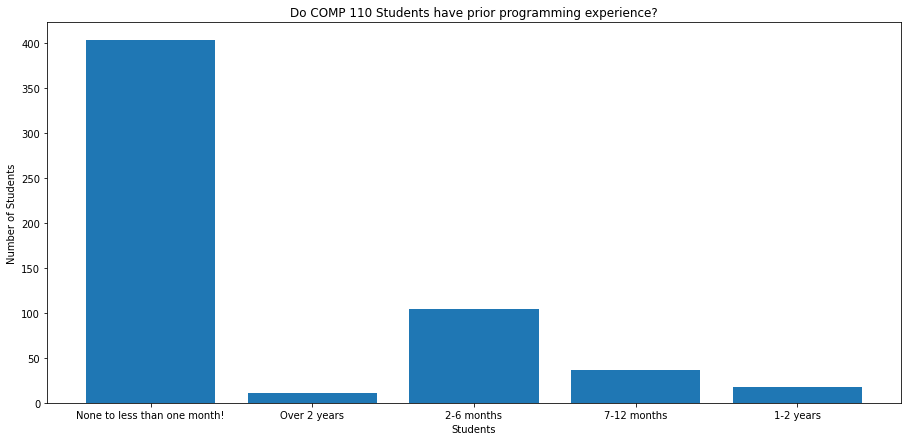

In [43]:
from matplotlib import pyplot as plt

names = counts.keys()
values = counts.values()

plt.figure(figsize=(52, 7))
plt.subplot(131)
plt.bar(names, values)
plt.title("Do COMP 110 Students have prior programming experience?")
plt.xlabel('Students')
plt.ylabel('Number of Students')
plt.show()


 # Great! Now to top this finding off, I think it would best if I cross-matched this data off with data from the "would_recommend" column. Let's see if we can create a data table that both displays prior experience and willingness to recommend COMP 110.

## First, I'll view a portion of recommendations:

In [44]:
from tabulate import tabulate

overdrive: dict[str, list[str]] = select(columns, ["would_recommend"])
thunderdrive: dict[str, list[str]] = head(overdrive, 20)

tabulate(thunderdrive, thunderdrive.keys(), "html")

would_recommend
7
7
7
7
7
4
6
4
6
5


## Now that I've done that, let's see if I can produce a count of each individual input of a recommendation.

In [45]:
from data_utils import count


elms: dict[str, int] = count(overdrive["would_recommend"])
print(f"exp_counts: {elms}")

exp_counts: {'7': 197, '4': 88, '6': 134, '5': 92, '1': 12, '3': 34, '2': 16}


## That's a lot of data! Let's see if I can't combine both the data table for prior experience and COMP 110's students' willingness to recommend the class.

In [46]:
from tabulate import tabulate
from data_utils import concat

data_combined: dict[str, list[str]] = concat(sunset, thunderdrive)
tabulate(data_combined, data_combined, "html")

prior_exp,would_recommend
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
Over 2 years,4
None to less than one month!,6
None to less than one month!,4
None to less than one month!,6
None to less than one month!,5


The above data table worked, but to make it cleaner, I will create an equalizer (eq) function that will make the length of the values of each column equivalent. However, that will come later for now.

## Now, let's see if we can sort this data table to only get the response 'None to less than one month!'.

To do so, I'll use my 'git_listy' function to return a dict with the responses (values) from a dict[str, list[str]] that's desired.

In [47]:
from data_utils import git_listy

wanted_prior_exp = git_listy(sunset, "None to less than one month!")
tabulate(wanted_prior_exp, wanted_prior_exp.keys(), "html")


prior_exp
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!
None to less than one month!


Now let's see how our desired prior experience responses stack up against recommendations. This time, I'll use my eq function to make the vlaues of both columns equivalent.

In [48]:
from data_utils import eq

needed_data = concat(wanted_prior_exp, thunderdrive)
equivalent_dicts = eq(needed_data)
tabulate(equivalent_dicts, equivalent_dicts.keys(), "html")

prior_exp,would_recommend
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,4
None to less than one month!,6
None to less than one month!,4
None to less than one month!,6


In [49]:
print(overdrive)

{'would_recommend': ['7', '7', '7', '7', '7', '4', '6', '4', '6', '5', '4', '4', '5', '6', '6', '6', '7', '5', '1', '3', '7', '7', '7', '7', '5', '5', '6', '4', '5', '6', '5', '5', '7', '5', '2', '3', '4', '7', '4', '2', '5', '3', '4', '7', '7', '5', '7', '6', '6', '5', '2', '6', '2', '3', '5', '7', '5', '7', '5', '5', '6', '6', '7', '6', '4', '5', '7', '7', '5', '5', '6', '5', '4', '4', '7', '7', '7', '6', '6', '7', '6', '4', '7', '4', '7', '4', '5', '3', '6', '6', '5', '3', '3', '6', '7', '2', '7', '7', '6', '3', '5', '7', '7', '3', '7', '3', '6', '7', '4', '7', '7', '7', '5', '5', '7', '5', '6', '5', '7', '5', '7', '5', '3', '7', '7', '4', '1', '5', '4', '4', '4', '7', '7', '7', '7', '7', '6', '6', '7', '7', '7', '6', '5', '7', '7', '4', '7', '7', '5', '7', '6', '5', '6', '7', '6', '7', '7', '7', '7', '7', '7', '6', '7', '7', '7', '7', '6', '6', '7', '7', '5', '7', '7', '5', '6', '6', '6', '6', '7', '7', '7', '7', '5', '5', '6', '7', '6', '6', '7', '7', '5', '7', '7', '7', '2', '7',

To further specify our data, I'll define a good recommendation to be any rating above 4. Given that a good recommendation is any number greater than 4, let's filter through some of the recommendations.

In [50]:
from data_utils import ratings_filter

filtered_recommendations = ratings_filter(thunderdrive, 6)
new_needed_data = concat(wanted_prior_exp, filtered_recommendations)
print(new_needed_data)
new_equivalent_dicts = eq(new_needed_data)
tabulate(new_equivalent_dicts, new_equivalent_dicts.keys(), "html")

{'prior_exp': ['None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!', 'None to less than one month!'], 'would_recommend': ['7', '7', '7', '7', '7']}


prior_exp,would_recommend
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7
None to less than one month!,7


Here's a messy example of how all of the data looks, filtered of course.

In [51]:
total_filtered_recommendations = ratings_filter(overdrive, 4)
total_filtered_recommendations

{'would_recommend': ['7',
  '7',
  '7',
  '7',
  '7',
  '6',
  '6',
  '5',
  '5',
  '6',
  '6',
  '6',
  '7',
  '5',
  '7',
  '7',
  '7',
  '7',
  '5',
  '5',
  '6',
  '5',
  '6',
  '5',
  '5',
  '7',
  '5',
  '7',
  '5',
  '7',
  '7',
  '5',
  '7',
  '6',
  '6',
  '5',
  '6',
  '5',
  '7',
  '5',
  '7',
  '5',
  '5',
  '6',
  '6',
  '7',
  '6',
  '5',
  '7',
  '7',
  '5',
  '5',
  '6',
  '5',
  '7',
  '7',
  '7',
  '6',
  '6',
  '7',
  '6',
  '7',
  '7',
  '5',
  '6',
  '6',
  '5',
  '6',
  '7',
  '7',
  '7',
  '6',
  '5',
  '7',
  '7',
  '7',
  '6',
  '7',
  '7',
  '7',
  '7',
  '5',
  '5',
  '7',
  '5',
  '6',
  '5',
  '7',
  '5',
  '7',
  '5',
  '7',
  '7',
  '5',
  '7',
  '7',
  '7',
  '7',
  '7',
  '6',
  '6',
  '7',
  '7',
  '7',
  '6',
  '5',
  '7',
  '7',
  '7',
  '7',
  '5',
  '7',
  '6',
  '5',
  '6',
  '7',
  '6',
  '7',
  '7',
  '7',
  '7',
  '7',
  '7',
  '6',
  '7',
  '7',
  '7',
  '7',
  '6',
  '6',
  '7',
  '7',
  '5',
  '7',
  '7',
  '5',
  '6',
  '6',
  '6',
  '6',
 

Now lets plot two bar graphs of the above data tables at their full capacity of values to see if the trend we hypothesized is true.

Text(0, 0.5, 'Number of Students Responses')

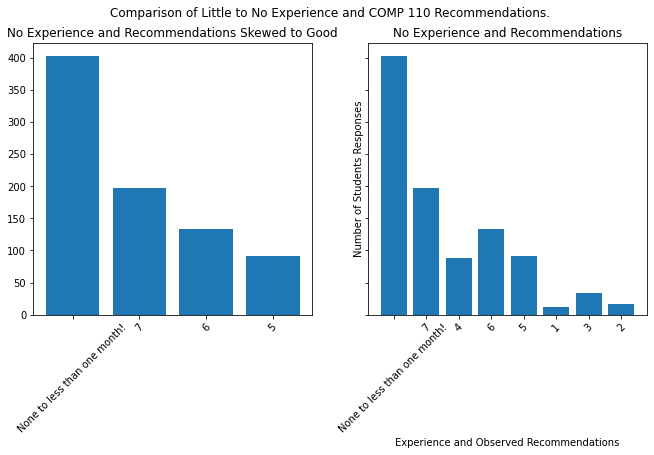

In [52]:
from matplotlib import pyplot as plt
from data_utils import concat_int

wanted_prior_exp_two = git_listy(subset, "None to less than one month!")
skewed_recs = ratings_filter(overdrive, 4)
t = count(wanted_prior_exp_two["prior_exp"])
tt = count(skewed_recs["would_recommend"])
new_int_data = concat_int(t, tt)

new_int_data_two = concat_int(t, elms)

fig, axes = plt.subplots(1, 2, figsize=(11, 5), sharey=True)
fig.suptitle("Comparison of Little to No Experience and COMP 110 Recommendations.")

axes[0].set_title("No Experience and Recommendations Skewed to Good")
axes[0].bar(new_int_data.keys(), new_int_data.values())
axes[0].tick_params(axis='x', labelrotation = 45)


axes[1].set_title("No Experience and Recommendations")
axes[1].bar(new_int_data_two.keys(), new_int_data_two.values())
axes[1].tick_params(axis='x', labelrotation = 45)
plt.xlabel('Experience and Observed Recommendations')
plt.ylabel('Number of Students Responses')

## Viewing the two bar graphs and their trends, one can see that most students who have reported that they enrolled into COMP 110 with little to no experience tend to give good recommendations (recommendations with a rating over 4). Though, a sizable amount of the recommendations from our wanted prior_exp are of rating '4'.

 ## To futher insure that my hypothesis stands, let's use addem_up one more time to create another ratio.

In [53]:
print(elms)

print(f" unfiltered recommendations: {addem_up(elms)}")
print(f" filtered recommendations: {addem_up(count(total_filtered_recommendations['would_recommend']))}")


{'7': 197, '4': 88, '6': 134, '5': 92, '1': 12, '3': 34, '2': 16}
 unfiltered recommendations: 573
 filtered recommendations: 423


## The above data is the count of how many total recommendations there were for our desired exp (573) and the filtered recommendations that skew to good recommendations [to those above '4'] (423).

To get the number of recommendations that are 'bad', we need only subtract the two and find the difference.

In [54]:
non_filtered_recs = addem_up(elms)
filtered_recs = addem_up(count(total_filtered_recommendations["would_recommend"]))
unwanted_recs = non_filtered_recs - filtered_recs
print(f"The difference is: {unwanted_recs}")
print(f"Therefore, there are {unwanted_recs} 'bad' recommendations.")

The difference is: 150
Therefore, there are 150 'bad' recommendations.


## This means that our hypothesis stands victorious amoungst all of the sorted data!

In [55]:
ratio_of_recs_from_nonfiltered_to_filtered = (filtered_recs / non_filtered_recs)
print("Here's the ratio (or percent) of recommendations from our gathered data:")
print(f'''{non_filtered_recs} / {filtered_recs} = {ratio_of_recs_from_nonfiltered_to_filtered}''')
print(f"This means that {round(ratio_of_recs_from_nonfiltered_to_filtered * 100)}% of the total recommendations amoungst students with no prior_exp are good ones!")
print("Good job team 110! Y'all are rock stars!")

Here's the ratio (or percent) of recommendations from our gathered data:
573 / 423 = 0.7382198952879581
This means that 74% of the total recommendations amoungst students with no prior_exp are good ones!
Good job team 110! Y'all are rock stars!


## Here it is! I believe my initial hypothesis was correct. It appears that nearly 7/10 students who are enrolled in this course did not bring any prior experience in programming to COMP 110. Therefore, it is safe to conlcude that most students enrolled/registered for COMP 110 do not have prior programming experience. Moreover, our analysis of the 'Would Recommend' column led us to find that 74% of students who take COMP 110 with no prior_exp tend to recommend the class. To me, being willing to recommend the course to a friend at such a sublime rate of confidence, means that these students are really satisfied in the not only the course, but the instruction, personnel, and topics incorporated with the course as well!

# Hypothesis concluded!